#Demonstration: Warehouse Robot Path Planning using Q-Learning

#Scenario

- A robot in a warehouse represented as a 5×5 grid must learn to move from the entrance at (0, 0) to the goal at (4, 4) while avoiding obstacles at positions like (1, 1), (2, 2), and (3, 1).
It should learn the most optimal path using Reinforcement Learning (Q-Learning).

##Importing Libraries
- Required libraries for environment, agent, visualization, and Q-table management.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

##Defining the GridWorld Environment
- Creates a 5×5 environment with a goal and obstacles. Returns next state, reward, and done flag based on robot's movement.

In [9]:
class GridWorld:
    def __init__(self, size=5, goal=(4, 4), obstacles=[(1, 1), (2, 2), (3, 1)]):
        self.size = size
        self.goal = goal
        self.obstacles = obstacles
        self.state = (0, 0)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        i, j = self.state
        if action == 'up': i = max(i - 1, 0)
        elif action == 'down': i = min(i + 1, self.size - 1)
        elif action == 'left': j = max(j - 1, 0)
        elif action == 'right': j = min(j + 1, self.size - 1)

        next_state = (i, j)
        reward = 1 if next_state == self.goal else -1 if next_state in self.obstacles else -0.1
        done = next_state == self.goal or next_state in self.obstacles
        self.state = next_state
        return next_state, reward, done

##Initialize Q-Table
- Each grid state has 4 possible actions. We initialize their values to zero.

In [10]:
actions = ['up', 'down', 'left', 'right']
Q = {(i, j): {a: 0.0 for a in actions} for i in range(5) for j in range(5)}

##Q-Learning Parameters + Training
- Loop through episodes and train the robot to learn the best Q-values using the Q-Learning formula.

In [11]:
alpha = 0.1     # learning rate
gamma = 0.9     # discount factor
epsilon = 0.2   # exploration rate
episodes = 500
env = GridWorld()
rewards_per_episode = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = random.choice(actions) if random.uniform(0, 1) < epsilon else max(Q[state], key=Q[state].get)
        next_state, reward, done = env.step(action)
        next_max = max(Q[next_state].values())
        Q[state][action] += alpha * (reward + gamma * next_max - Q[state][action])
        state = next_state
        total_reward += reward

    rewards_per_episode.append(total_reward)

##Reward Trend Visualization
- Shows how the total reward changes over episodes to indicate learning progression.

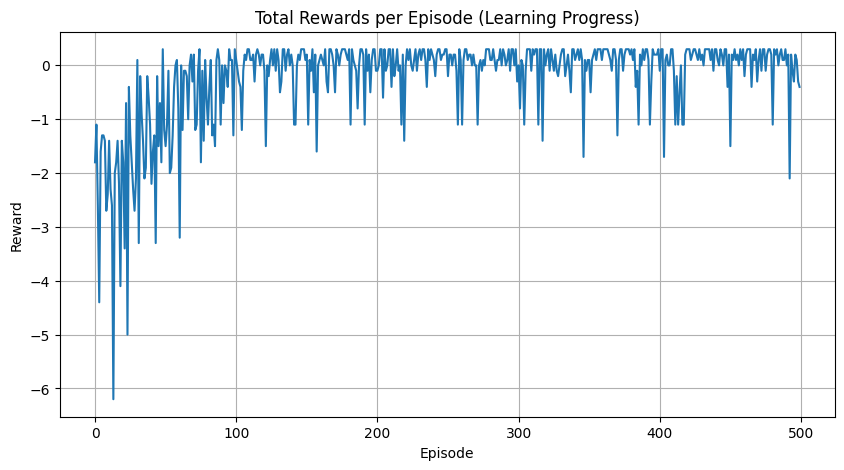

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(rewards_per_episode)
plt.title("Total Rewards per Episode (Learning Progress)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

##Q-Value Heatmaps (Action-wise)
- Visualizes learned values for each action across all states using heatmaps.

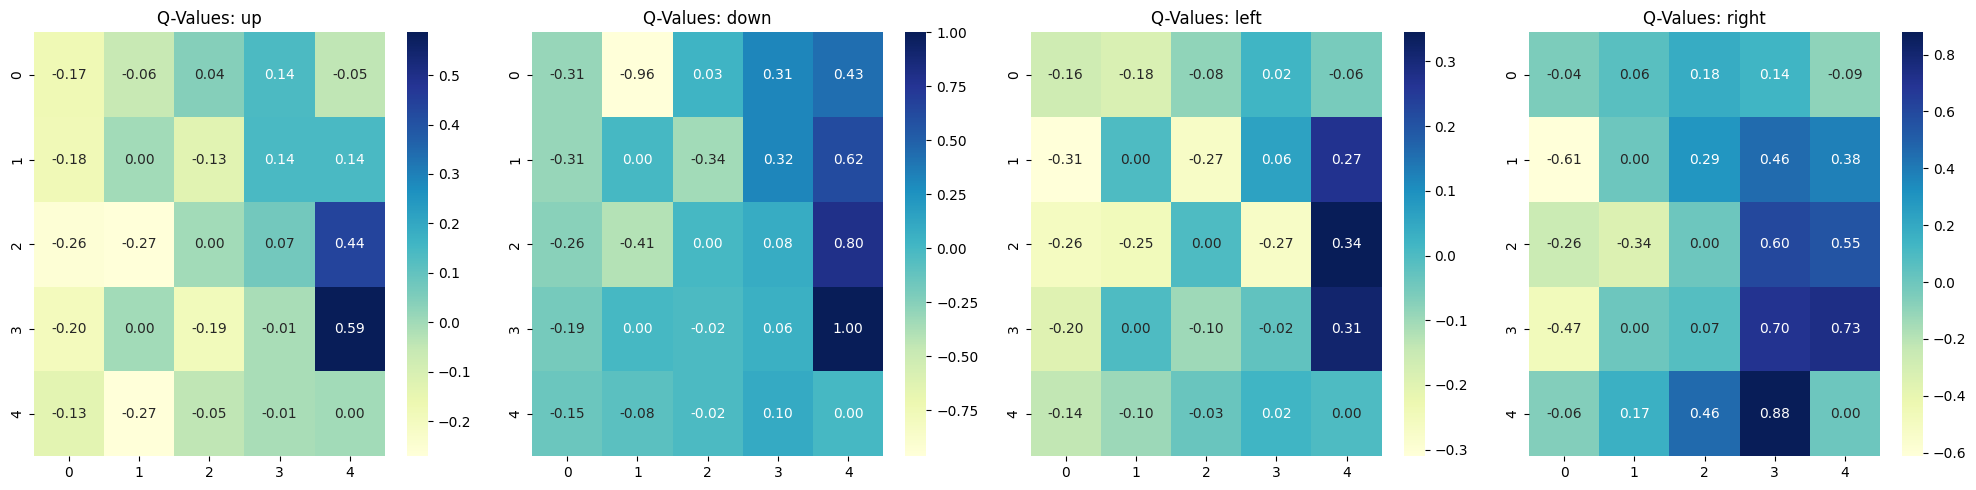

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for idx, action in enumerate(actions):
    q_vals = np.array([[Q[(i, j)][action] for j in range(5)] for i in range(5)])
    sns.heatmap(q_vals, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[idx])
    axs[idx].set_title(f"Q-Values: {action}")
plt.tight_layout()
plt.show()

##Get Optimal Path
- Greedily chooses the best action at each state from Q-table to form the final path from start to goal.

In [14]:
def get_optimal_path(Q, start=(0,0), goal=(4,4)):
    path = [start]
    state = start
    while state != goal:
        action = max(Q[state], key=Q[state].get)
        i, j = state
        if action == 'up': i = max(i - 1, 0)
        elif action == 'down': i = min(i + 1, 4)
        elif action == 'left': j = max(j - 1, 0)
        elif action == 'right': j = min(j + 1, 4)
        next_state = (i, j)
        if next_state in path: break  # prevent loops
        path.append(next_state)
        state = next_state
    return path

optimal_path = get_optimal_path(Q)
print("Optimal Path from (0,0) to (4,4):", optimal_path)

Optimal Path from (0,0) to (4,4): [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


##Visualize Path on Grid
- Plots the grid with obstacles, path, start, and goal clearly marked.

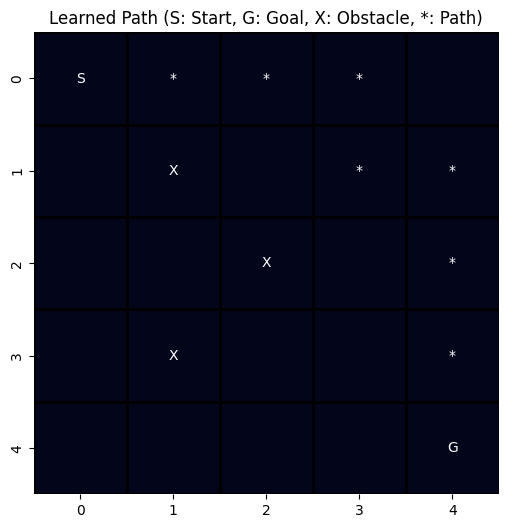

In [15]:
grid = np.full((5, 5), ' ')
for i, j in env.obstacles:
    grid[i, j] = 'X'
grid[0, 0] = 'S'
grid[4, 4] = 'G'
for i, j in optimal_path[1:-1]:
    grid[i, j] = '*'

plt.figure(figsize=(6, 6))
sns.heatmap(np.full((5, 5), 1), cbar=False, annot=grid, fmt='s', linewidths=1, linecolor='black')
plt.title("Learned Path (S: Start, G: Goal, X: Obstacle, *: Path)")
plt.show()

##Final Q-Table Preview
- Shows Q-values for first 10 states to understand robot decisions.

In [16]:
pd.DataFrame([
    {'State': state, **Q[state]} for state in list(Q.keys())[:10]
])

,State,up,down,left,right
0,"(0, 0)",-0.172476,-0.308786,-0.162598,-0.043406
1,"(0, 1)",-0.057957,-0.961848,-0.184026,0.062882
2,"(0, 2)",0.042963,0.028956,-0.084571,0.180980
3,"(0, 3)",0.139680,0.312200,0.017541,0.137770
4,"(0, 4)",-0.045289,0.432840,-0.055815,-0.089723
5,"(1, 0)",-0.177875,-0.308155,-0.310152,-0.612580
6,"(1, 1)",0.000000,0.000000,0.000000,0.000000
7,"(1, 2)",-0.129061,-0.343900,-0.271000,0.291213
8,"(1, 3)",0.143151,0.317244,0.061132,0.458000
9,"(1, 4)",0.144121,0.620000,0.268825,0.383350


- The robot learned from trial and error using Q-learning to avoid obstacles and reach the goal.

- Final results visually and numerically confirm success.

- This kind of logic can be extended to real warehouse navigation systems, delivery bots, and inventory automation.